***
<a id='beginning'></a> <!--\label{beginning}-->
* [Outline](../0_Introduction/0_introduction.ipynb)
* [Glossary](../0_Introduction/1_glossary.ipynb)
* [4. The Visibility space](4_0_introduction.ipynb)
    * Previous: [4.1 The Baseline and Its Representation in Space](4_1_The_Baseline_and_its_representations_in_space.ipynb)
    * Next: [4.3 The Visibility Function](4_3_The_Visibility_Function.ipynb)

***

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import HTML 
HTML('../style/course.css') #apply general CSS

In [1]:
from IPython.display import HTML
HTML('../style/code_toggle.html')

## 4.2 The 2-element Interferometer

## Outline
### 4.2.1 From optical to radio interferometry
* 4.2.1.A Back to the basics: physical optics interferometry

* 4.2.1.B General considerations in the receiving case

* 4.3.1.C Link with the Fourier Transform

### 4.2.2 First approach to radio interferometry

*  4.2.2.A The $\sum$-interferometer

*  4.2.2.B The $\Pi$-interferometer with a $\cos$ correlator

*  4.2.2.C The $\Pi$-interferometer with a $\sin$ correlator

### 4.2.3 The complex correlator and the complex visibility

*  4.2.3.A First definition of the visibility

*  4.2.3.B Effect of the bandwidth, necessity of delay tracking

___

Understanding basic interferometry requires to spend time on the simple 2-element interferometer case. As previously seen in 
[$\S$ 1.9 &#10142;](../1_Radio_Science/01_09_a_brief_introduction_to_interferometry.ipynb), we will specifically derive the response of this ideal interferometer and this response leads to the sampling of the visibility function, which can be associated with the structure of the source.

This will enable us to establish what is the measured quantity by the interferometer and how it relates to the derivation of a fringe pattern.
The questions we want to address here, is 
- *What is interfering in radio interferometry ?*
- *how the measurement can inform us about the observed sky ?*.

### 4.2.1 From optical to radio interferometry

Before addressing the "interferometry" part of the course, we will start by quickly reviewing the basic results of optical interferometry. As we will see, one should not confuse the "interferometry" technique used in optical in general with what is done in the radio, even though a lot of similarities are present.

#### 4.2.1.A Back to the basics: physical optics interferometry

**Wave superposition theorem**

Let $S_1$ and $S_2$ be two point sources, *coherent* and *in phase* emitting two waves $s_1(r,t)$ and $s_2(r,t)$ propagating in space at speed *c*. The point P in Fig. [4.2.1 &#10549;](#fig:421) will received the linear superposition of the two waves:

$$s(r,t)=s_1(r_1,t)+s_2(r_2,t)$$

with $r$, $r_1$, $r_2$ are respectively the radial distances from an origin $O$ that we locate between the two sources, from $S_1$ and from $S_2$.

\begin{eqnarray}
s(r,t) &=& s_1(r,t)+s_2(r,t) \\
s(r,t) &=& \frac{s_{01}}{r_1} e^{\imath (\omega_1 t - k_1 r +\varphi_1)}+\frac{s_{02}}{r_2} e^{\imath (\omega_2 t - k_2 r + \varphi_2)}
\end{eqnarray}

with $s_{01}$ and $s_{02}$ the amplitude of the two waves.

If the sources are emitting waves with the same amplitude ($s_{01}=s_{02}=s_{0}$), angular frequency ($\omega_1=\omega_2=\omega$), and phase ($\varphi_1=\varphi_2=\varphi_0$), then:



$s_1(r_1=0,t)=s_2(r_2=0,t)=s_0 e^{\imath \omega t}$

In the above equation, we have chosen the initial phase $\varphi_0 = 0$.

At point $P$, the two waves can be written:

\begin{eqnarray}
s_{1P}(r_1,t) &=& s_0 \exp{\imath \left[ \omega (t - \frac{r_1}{c}) \right]} \\
s_{2P}(r_2,t) &=& s_0 \exp{\imath \left[ \omega (t - \frac{r_2}{c}) \right]} \\
\end{eqnarray}

We can therefore rewrite the initial phase of these signals at point $P$,
$$\varphi_1=-\omega \frac{r_1}{c} \quad s_{1P}(r_1,t)=s_0 \exp{\imath (\omega t + \varphi_1)}$$

$$\varphi_2=-\omega \frac{r_2}{c} \quad s_{2P}(r_2,t)=s_0 \exp{\imath (\omega t + \varphi_2)}$$

One can notice that the two signals are out of phase at point $P$ by the quantity $\Delta \Phi=\varphi_2-\varphi_1$. This phase difference can be associated with a time delay and a distance between two paths travelled by the light.

To derive this delay, we first need a definition of the *optical path length* (OPL), which is defined along a curve $\mathcal{C}$: 
$$ OPL = \int_\mathcal{C} n(s)ds$$
where $n$ is the optical index of the propagation medium ($n=1$ in vacuum) and $s$ the curvilinear abscissa along the path.

With this definition, we can define the *optical path difference* (OPD) $\Delta l$ as the physical difference length between the path from $S_1$ to $P$ and from $S_2$ to $P$:

$$ \Delta l = S_1P - S_2P = r_1-r_2 \quad \Delta \Phi = \varphi_2-\varphi_1 = 2 \pi \frac{\delta}{\lambda}$$

<a id="fig:421"></a>
<img src='figures/Interferences.svg' width=50%>

**Figure 4.2.1**: Interference region between two emitting sources $S_1$ and $S_2$. At position P, we received the superposition of the two waves.

The phase $\Delta \Phi$ depends on $\delta=r_1-r_2$, or equivalently, the position of $P$ w.r.t. the sources.

As seen previously, the incoming waves at $P$ are summed. Assuming that $S_1$ and $S_2$ have the same properties as outlined earlier, the resulting signal has the same frequency $\omega$ as the constituent waves, but has an amplitude $S_{0P}$ which depends on the relative amplitude and phase of the two waves at the location $P$:

$$s_P(t)=S_{0P} \cos( \omega t + \phi_{0P})$$

$$\text{ with } S_{0P}=\sqrt{\underline{s_P} \underline{s_P}^*}=\sqrt{S_{01}^2+S_{02}^2+2 S_{01} S_{02} \cos \Delta \Phi} = \sqrt{2 S_0^2(1+ \cos\Delta \Phi)}$$

The amplitude $S_{0P}$ depends on the location of $P$ in space.

**Interfering conditions**

The $\cos$ term in the previous equation will modulate the amplitude of the wave. We can define two regimes depending on the value of $S_{0P}$:


* $S_{0P}$ is maximal when $\cos \Delta\Phi = +1$, i.e. $\Delta \Phi = 2 m \pi$ with $m \in \mathbb{Z}$, meaning that $\delta = m \lambda$. The two waves add in phase. In this case, we have *constructive interference*.
* $S_{0P}$ is null when $\cos \Delta\Phi = -1$, i.e. $\Delta \Phi = (2m+1) \pi$ with $m \in \mathbb{Z}$, meaning that $\delta = (m+\frac{1}{2}) \lambda$. The two waves have opposite phase and therefore will cancel out. In that case, we have have *destructive interference*.

This creates an interference pattern with an amplitude which depends on the location in space. This inerference pattern is also known as the *fringe pattern*. This pattern is composed of fringes which correspond to the location of constant phase in space. One fringe is defined as the location of points where $S_1 P - S_2 P = \text{const}$.
In the three-dimensional space, the fringes are defined by sets of hyperboloids with axial symmetry around the axis $S_1S_2$ (see Fig. [4.2.2 &#10549;](#fig:422)). Each hyperboloid correspond to a particular constant. 

- In the plane perpendicular to the axis $S_1S_2$, and located mid-way between the sources, $\delta =0$, and therefore we have a bright fringe.
- Conversely, in any plane containing the axis $S_1S_2$, the fringes are hyperbolas.
- Far from the sources, in any plane perpendicular to the axis $S_1S_2$, circular fringes will be observed.
- Far from the sources, in any plane parallel to the axis $S_1S_2$, linear fringes will be observed.

<a id="fig:422"></a>
<img src='figures/interferences3D.png' width=70%>

**Figure 4.2.2**: Interference region between two emitting sources $S_1$ and $S_2$ in three-dimensional space. The amplitude of the interference pattern takes the shape of circular hyperboloids. The axis $S_1S_2$ is a characteristic axis of symmetry in the system. In a plane perpendicular to this axis, we observe circular fringes in the far-field, and in a plane parallel to this axis, we observe linear fringes in the far-field.

<div class=advice>
**Note:** There is a continuous variation in fringe shape from linear to circular as the plane of observation moves from being parallel to the axis $S_1S_2$ to perpendicular to it. 
</div>


<div class=warn>
**Warning:** The interference fringes are clearly visible when the two waves share approximately the same physical characteristics (amplitude, frequency), see note on temporal/spatial coherence below.<br>
</div>


#### 4.2.1.B General considerations in the receiving case

In the "emitting" case, we have seen that two overlapping wave originating from two point sources can interfere. The location of these interference lead to the creation of interference pattern when collected on a screen (Fig. [4.2.2 &#10549;](#fig:422)). 
In the "receiving" case, we will consider two point receivers illuminated by a single plane wave coming from a point point source located at the infinite. Before studying how the interference take place in that case, we need to introduce the notion of temporal and spatial coherency to characterize the travelling wave before they reach the receivers.

<div class=advice>
##### Notion of temporal/spatial coherence
We only introduce an intuitive approach to the concept of coherence of a wave. The *coherence* of a wave is its degree of capability to maintain its "shape" (i.e. the degree of phase correlation) along its propagation at different locations and different times.

A propagating wave has a *temporal coherence* if the phase difference between any two points, at an instant of time, along the direction of propagation (e.g. $P_1$ and $P'_1$ on Fig. [4.2.3a &#10549;](#fig:423)) is independent of time. Meaning that successive wavefronts are propagating between the two points with the same delay. The temporal coherence tell us how monochromatic a source is.

Similarly, a propagating wave has *spatial coherence* if the phase difference, between any two points in a plane perpendicular to the direction propagation and at an instant of time, (here $P_2$ and $P'_2$ on Fig. [4.2.3 &#10549;](#fig:423)) is independent of time. Meaning that the spatial shape of the wavefront remains the same while propagating.
The spatial coherence tell us how uniform the phase of a wavefront is and is usually associated with the extension of the source.

In Fig. [4.2.3 &#10549;](#fig:423), we illustrate the various regimes where a wave has temporal or spatial coherence. The green lines illustrate how the phase difference between random couples of points taken in (resp. perpendicular to) the direction of propagation is independent of the time as the wave propagates. Conversely, the red lines show how these phases are no longer independent of time.

Those coherences, if not maintained, will blur the fringe pattern as the wave are interfering *destructively*.
The spectral coherence and polarization coherence has also to be considered but is not addressed in this section.
<a id="fig:423"></a>

<img src='figures/coherence.svg' width=80%>

**Figure 4.2.3**: **(a)** Wave with both spatial and temporal coherence **(b)** Spatial coherence and no temporal coherence **(c)** temporal coherence and no spatial coherence **(d)** no spatial coherence and no temporal coherence.

This intuitive presentation demonstrate that extended sources (due to varying wavefronts) and multi-frequency sources (due to a mix of various wavelength) are emitting incoherent waves. 
In the following, we will assume that the wave coming from one point source has both spatial and temporal coherency.

##### Foreword on array pointing, phase center and projected baseline

Before moving to the full 3D case where we have to consider the response of an interferometer towards the celestial sphere, we will focus on the simple case of a 1D interferometer composed of two elements, observing a coherent plane wave coming from a point source at the infinite. In the following, we are assuming both temporal and spatial coherences of the emitting source.

This simple interferometer is composed of two isotropic receivers lying on the ground (Fig. [4.2.4 &#10549;](#fig:424)), separated by a distance $|\mathbf{b}|$. As in [$\S$ 1.2 &#10142;](../1_Radio_Science/01_02_electromagnetic_radiation_and_astronomical_quantities.ipynb), we will consider that the array is illuminated by an electromagnetic plane wave coming from a direction $\mathbf{s_0}$, forming an angle $\theta$ w.r.t. the baseline. 

<a id="fig:424"></a>
<img src='figures/interferencereceivers.svg' width=40%>

**Figure 4.2.4**: The projection of baseline $\mathbf{b}$ towards the direction $\theta$ along $\mathbf{s}_0$ in a simple 1-D sky/baseline example.

The inclination of the source causes an extra optical path length $\Delta L$ to be travelled by the wave (at the speed of light) to reach $R_1$ compared to $R_2$. This OPL is defined as $\Delta L = \lvert \mathbf{b} \rvert \cos \theta$.

In order to combine the signals measured by $R_1$ and $R_2$, we need to compensate for this extra delay. In an interferometer, correcting for this delay is the process of *fringe (or delay) tracking*.
The result of this correction is to define the direction $\mathbf{s_0}$ on the celestial sphere as the *phase center* of the array.

een from the source, the array appears to be projected on a plane perpendicular to the direction of propagation (coinciding with the incoming plane wave at direction $\mathbf{s_0}$). The apparent projected distance between the antennas is $|\mathbf{b}|\sin \theta$. This length is called the *projected baseline*. Express with vectors, the extra OPL can obtained by projecting $\mathbf{b}$ onto $\mathbf{s_0}$: 
$$\delta L= \mathbf{b} \cdot \mathbf{s_0}$$

As the source moves on the celestial sphere (due to Earth rotation), the apparent baseline length will change (see [$\S$ 4.4 &#10142;](4_4_1_UV_Coverage_UV_Tracks.ipynb) about how we can exploit this effect). To continue to follow a particular source which is moving with the celestial sphere, the delay compensation should continuously be adapted to the variation of the projected baseline in order to maintain source at the phase center.

<div class=warn>
**Warning**: in the real world, the antennas are usually two steerable dishes with a directional response (or *beam*) which is NOT isotropic. To measure a signal coming from a direction $\mathbf{s_0}$ (Fig. [4.2.4 &#10549;](#fig:424)), we first need to point these antennas towards this direction to maximize the antenna response. see [$\S$ 7.5 &#10142;](../7_Observing_Systems/7_5_primary_beam.ipynb)
</div>

Let's now consider planes waves coming from two unrelated point sources in the directions $\mathbf{s_0}$ and $\mathbf{s}$ in the sky.

<a id="fig:425"></a>
<img src='figures/interferencereceivers2.svg' width=40%>

**Figure 4.2.5**: Two receivers receiving plane waves from directions $\mathbf{s_0}$ and $\mathbf{s}$ in the sky.

In this case, the two wavefronts are spatially and temporally incoherent. Therefore, those signals will not interfere between themselves. As a consequence, the response of the interferometer towards the two sources will be the sum of the response toward each source, allowing linearity between the different contributions of the sky.

Again, we consider $\mathbf{s_0}$ to be the phase center of the interferometer. Any other arbitrary direction $\mathbf{s}$ can be related to $\mathbf{s_0}$ through the difference vector $\boldsymbol{\sigma}=\mathbf{s}-\mathbf{s_0}$ (as illustrated on Fig. [4.2.5 &#10549;](#fig:425)). For small $|\boldsymbol{\sigma}|$, this vector $\boldsymbol{\sigma}$ lies approximately in the plane orthogonal to $\mathbf{s_0}$ and is tangent to the celestial sphere. It defines the location of a source in this plane sky relative to the reference direction $\mathbf{s_0}$.
Later on, $\boldsymbol{\sigma}$ will be used to derive the response of an interferometer at any position in that plane.

Given the directions ($\mathbf{s}, \mathbf{s_0}$), the OPDs are obtained via a scalar product with $\mathbf{b}$. 
We can compute them directly via the scalar product of $\mathbf{b}$ with $\boldsymbol{\sigma}$.

$$\mathbf{b} \cdot \boldsymbol{\sigma} = \mathbf{b} \cdot (\mathbf{s} - \mathbf{s_0}) = \text{OPD}_{\mathbf{s}}-\text{OPD}_{\mathbf{s_0}}$$

<div class=warn>
**Warning:** Unlike the *emitting* case where we considered two spatially separated sources which emit perfectly coherent and in phase waves (see $\S$ 4.2.1), the two incoming signals received by $R_1$ (or $R_2$) **DO NOT INTERFERE**. The waves arriving at $R_1$ (or at $R_2$) come from **different** and therefore, spatially incoherent sources of the sky. It is critical to understand that there is no equivalence between the **emitting** case and the **receiving** case.</div>


<div class=warn>
**Warning:** For the moment, the vector $\mathbf{s}$ and $\mathbf{s_0}$ are unitary and defined with angles only. Therefore, the length of $\boldsymbol{\sigma}$ is a projected angular distance on the sky (defined in terms of direction cosines ($l$, $m$, $n$) defined in [$\S$ 3.4 &#10142;](../3_Positional_Astronomy/3_4_Direction_Cosine_Coordinates.ipynb) ).</div>


### 4.2.2 First approach to radio interferometry

Contrary to Fig. [4.2.1 &#10549;](#fig:421), we do not consider the interference of two superposing waves at point P in the interfering space. We consider the combination of the measured signal received by the antenna. In the radio regimes, the receivers are composed of conductors which role is to collect and convert an EM wave into voltages which amplitude/phase is related to that of the converted wave (depending on the antenna impedance).
These voltage signals are the quantities which will interfere.

From the configuration presented in Fig. [4.2.5 &#10549;](#fig:425), we now try to understand what information can be extracted from different combinations of the measured voltages. We have seen that the extra optical path travelled by the plane wave will induce a time delay between the receivers signals. We need to take this information into account during the signal combination.

We can combine these signals:
* by addition to form a *sum* interferometer, or $\sum$-interferometer
* by multiplication to form a *product* interferometer, or $\prod$-interferometer.

Let's define the measured voltages, at the same frequency $\omega$ (related to the monochromatic wave frequency converted by the receivers):
$$V_1=V_{01} \cos (\omega t + \varphi_1)  \quad V_2 = V_{02} \cos (\omega t + \varphi_2)$$

Using the direction $\mathbf{s_0}$ as a reference direction of the incoming wave and $R_2$ as the reference antenna (shifting the origin of time so that $V_2$ has a phase of zero at the origin), we can recast the expressions of the signal as a function of $\Delta L$:


$$V_1=V_{01} \cos (\omega t + \varphi_1 - \varphi_2),  \quad V_2 = V_{02} \cos (\omega t)$$
$$\Leftrightarrow V_1=V_{01} \cos (\omega (t + \frac{\Delta L}{c})),  \quad V_2 = V_{02} \cos (\omega t)$$

We will assume that the voltage maximum amplitude are identical $V_{01}=V_{02}=V_0$.

#####  4.2.2.A The $\sum$-interferometer

Similarly to $\S$ 4.2.1.A, we can derive the result of the summation of the two signals.


$$V_\sum = V_1 + V_2 = V_{01} \cos{(\omega t + \varphi_1)} + V_{02} \cos{(\omega t + \varphi_2)}$$

As in $\S$4.2.1.A, we can compute the amplitude of the sum by computing 
$$A=\sqrt{(V_1 + V_2)^2}= \;... \;=\sqrt{2 V_0^2(1+ \cos\Delta \Phi)} \text{ with } \Delta\Phi = \varphi_1-\varphi_2$$

The amplitude of the sum is only modulated by the time delay between signals arriving at $R_1$ and $R_2$.

The problem with the $\sum$-interferometer is that the additive constant term $2 V_0^2$ is not known and cannot be easily removed. It represents the average level of the voltages product between $R_1$ and $R_2$.
We will see that in the $\prod$-interferometer, this is no longer a problem as this unknown factor will be a multiplying factor which can easily be normalized. In the following, we will focus more on the $\Pi$-interferometer which is the most commonly used in real life. 

The reader interested in more information on the $\sum$-interferometer can refer to (Kraus, $\S$6.20)[EXREF].

#####  4.2.2.B The $\prod$-interferometer with a $\cos$ correlator

The product of two signals can be implemented through the correlation operation. A correlator is a device which multiplies two voltages. To reduce the level of noise, the correlator performs some averaging in time. We will assume that this averaging time is long enough so that the fast temporal oscillations caused by $\omega t$ is smoothed out. It is equivalent to filter the signals with a low-pass filter which role is to remove the fast-varying component of the signal.

In our simple case, we will represent the correlation of the signal can be expressed as:

$$C= \langle V_1 V_2 \rangle_t$$ with $\langle \cdot \rangle_t$ the time averaging operator.

with $\tau=\frac{\Delta L}{c}$

\begin{eqnarray}
C&=&\langle V_{01} V_{02} \cos{\omega t} \cos{[\omega (t + \frac{\Delta L}{c}) ]} \rangle_t=&\langle V_{01} V_{02} \cos{\omega t} \cos{[\omega (t + \tau) ]} \rangle_t\\
C &=& V_0^2 \frac{\langle \cos(2 \omega t + \tau)+\cos (\omega \tau)\rangle_t}{2}
\end{eqnarray}
$$\boxed{C =\frac{V_0^2}{2}\cos{\omega \tau}=\frac{V_0^2}{2}\cos{(2 \pi \frac{\Delta L}{\lambda}})}$$

In $\S$ 4.2.1.A, we have highlighted the fact that the appearance of the interference fringe pattern depends on the location in space. We also found a condition on the phase to describe an individual fringe.

Similarly, we see here that the strengh of the correlation between the two measured signals will depends on the OPD, i.e. the time delay between the signals arriving at the antenna. As the time delay depends on the projected baseline, we will also create a fringe pattern which will spatially depends on the direction of the source $\mathbf{s_0}.

From the previous equation we can define the *fringe phase* which is the phase of the fringe pattern at the direction $\mathbf{s_0}$.
The fringe phase $\phi=\omega \tau=\frac{\omega}{c} |\mathbf{b}| \cos \theta= \frac{2\pi}{\lambda} |\mathbf{b}| \cos \theta$

As the Earth rotates, the observed source will slowly rotate on the celestial sphere. The delay tracking system will compensate for this motion by adjusting the correction between $R_1$ and $R_2$ (see $\S$ 4.2.3.B for a justification). As a consequence, the projected baseline, and therefore $\tau$, will change slowly.

We can characterize the speed of variation of phase with the *fringe rate*, defined as the derivative of the fringe phase w.r.t. $\theta$: $ |\frac{d\phi}{d\theta}|=\frac{2\pi}{\lambda} |\mathbf{b}\sin\theta|=\frac{2\pi}{T_f}$ where $T_f$ is the *fringe period*. Observing this fringe rate can contribute to localize precisely a source (see [$\S$ 4.3.2.C &#10142;](4_3_The_Visibility_Function.ipynb)) .

First result:

* The correlation of two measured signals can be associated with the angular position of the source with respect to the physical baseline.

* If $\lambda$ is small enough compared to the projected baseline $|\mathbf{b}|\sin\theta$, the phase of the correlation can precisely track the position of a source.

* As a consequence, the correlation is sensitive to spatial variations of spatial period $T_f$ which means that a 2-element interferometer acts as **spatial filter** for this spatial frequency.

The sky is composed of spatially incoherent sources (point and/or extended sources) which can be described with a continuous function $I_\nu(\boldsymbol{\mathbf{s}})$, called the sky brightness distribution. The response of an interferometer towards a collection of incoherent sources is the sum of the responses for each individual source. We can express the definition of the *total* correlation between $R_1$ and $R_2$ to the whole sky by summing over all the observable directions:

$$ C_{\cos}= \int_\Omega k(\mathbf{s}) \cos(2 \pi \frac{\Delta_L(\mathbf{s})}{\lambda})d\mathbf{s}$$
with $k(\mathbf{s})$ an implicit multiplying factor depending on $I_\nu(\mathbf{s})$. With this definition, $C_{\cos}$ is called a *cosine correlator*.

However, any function can be expressed as a sum of an *even* function and an *odd* function. 
The *cosine correlator* we just described, will in practice only be sensitive to the *even* part of the sky brigthness function. To be able to measure the *odd* part of the sky brigthness function, we should build a *sin* correlator.

<div class=advice>
**Note:** If the sky brightness is an odd function composed of two sources of opposite brightness: <br>
i.e. $I_\nu(\mathbf{s}_+)=+1$ and $I_\nu(\mathbf{s}_-)=-1$. In these two directions (marked "+" and "-"), we will have $\Delta L_+ = \Delta L_-$ and $k_+=-k_-$.<br>
With a *cosine correlator*, we will therefore have:

$$C_{\cos}= k_+ \cos{2 \pi \frac{\Delta L_{+}}{\lambda}} + k_- \cos{2 \pi \frac{\Delta L_{-}}{\lambda}}= k_+ \cos{2 \pi \frac{\Delta L_{+}}{\lambda}} - k_+ \cos{2 \pi \frac{\Delta L_{+}}{\lambda}}=0$$

The *odd* part of the sky brightness will not measured through the correlation with a *cosine* correlator.</div>

**What is the coefficient $k(\mathbf{s})$ ?**

By linearity, the voltage measured by each antenna is the integral of the contribution from all directions over their respective field of view $\Omega_1$ and $\Omega_2$.

$$V_1= \int_{\Omega_1} V_{1_\Omega} d \Omega_1 \quad V_2= \int_{\Omega_2} V_{2_\Omega} d\Omega_2$$



$V_{i_\Omega}$ is proportional to the power received from direction $\mathbf{s}$: 

$V_{i_\Omega} \propto \frac{1}{2} A_{\text{eff}}(\mathbf{s}) I_\nu(\mathbf{s})\Delta\nu d\Omega$ 

where $A_{\text{eff}}$ is the effective area of the antenna, $I_\nu$ the brightness distribution, $\Delta \nu$ the bandwidth of observation and $d\Omega$, an element of observing solid angle (see [$\S$ 1.2 &#10142;](../1_Radio_Science/01_02_electromagnetic_radiation_and_astronomical_quantities.ipynb) for definitions). The factor $\frac{1}{2}$ comes from the fact that, usually, only one polarization is measured by an antenna.

therefore,
$$C_{\cos}= \langle V_1 V_2 \rangle_t= \langle \int_{\Omega_1} V_{1_\Omega} d \Omega_1 \int_{\Omega_2} V_{2_\Omega} d \Omega_2 \rangle_t$$

We assume that all the emission from the sky is spatially incoherent, meaning that the only non-zero correlation is between two signals coming from the same direction. We can therefore swap the integrals with the time averaging brackets:

$$C_{\cos}= \langle V_1 V_2 \rangle_t= \int_{\Omega} \langle V_{1_\Omega} V_{2_\Omega} \rangle_t d \Omega \propto \Delta \nu \int_\Omega A(\mathbf{s}) I_\nu(\mathbf{s}) \cos(2 \pi \nu \frac{\Delta L}{c})d \Omega$$

For simplification, we can assume for now that $k(\mathbf{s}) \propto \Delta \nu A(\mathbf{s}) I_\nu (\mathbf{s}) $.


##### 4.2.2.C The $\prod$-interferometer with a $\sin$ correlator

A straightforward way to create a $\sin$ correlator is by introducing an artificial phase delay of $\frac{\pi}{2}$ in one of the two signal paths.
If we introduce this $\frac{\pi}{2}$ phase delay to the path of signal $V_2$, we obtain the following:


$$V_1=V_{01} \cos (\omega (t + \tau))  \quad V_2 = V_{02} \cos (\omega t + \frac{\pi}{2} )$$
\begin{eqnarray}
C&=&\langle V_{01} V_{02} \cos{(\omega t + \frac{\pi}{2})} \cos{[\omega (t + \tau) ]} \rangle_t\\
C&=& V_0^2 \frac{\langle \cos(2 \omega t + \tau + \frac{\pi}{2})+\cos (\omega \tau - \frac{\pi}{2})\rangle_t}{2}
\end{eqnarray}
$$\boxed{C_{\sin} =\frac{V_0^2}{2}\sin{\omega \tau}}$$

It is easy to verify that this correlator will only be sensitive to the odd part of the sky brightness.

<div class=advice>
**Note:** If the sky brightness is an even function composed of two sources of same brightness: <br>
i.e. $I_\nu(\mathbf{s}_+)=+1$ and $I_\nu(\mathbf{s}_-)=+1$. In these two directions (marked "+" and "-"), we will have $\Delta L_+ = \Delta L_-$ and $k_+=-k_-$. <br>
With a *sine correlator*, we will therefore have:

$$C_{\sin}= k_+ \sin{2 \pi \frac{\Delta L_{+}}{\lambda}} + k_- \sin{2 \pi \frac{\Delta L_{-}}{\lambda}}= k_+ \cos{2 \pi \frac{\Delta L_{+}}{\lambda}} - k_+ \sin{2 \pi \frac{\Delta L_{+}}{\lambda}}=0$$

The *even* part of the sky brightness will not measured through the correlation with a *sine* correlator.</div>

By implementing two parallel correlators ($\cos$ & $\sin$), one can measure the correlation of both the *even* and *odd* parts of the sky brightness $I_\nu$.

$$\boxed{C_{\cos} =\frac{V_0^2}{2}\cos{\omega \tau}} \quad \boxed{C_{\sin} =\frac{V_0^2}{2}\sin{\omega \tau}}$$

<div class=advice>
**Note:** This $\frac{\pi}{2}$ delay can be implemented electronically, in either analog or digital manner.</div>


### 4.2.3 The complex correlator and the complex visibility

##### 4.2.3.A First definition of Visibility

The previous section addressed the *practical* implementation of an interferometer observing an arbitrary sky. As we derived two interferometers with $\cos$ and $\sin$ correlators, we can combine these operations into one *complex* correlator:


\begin{eqnarray}
\underline{C}&=& \Re{(\underline{C})}-\imath\Im{(\underline{C})}=C_{\cos} - \imath C_{\sin}\\
\underline{C}&=& \sum_{n=0}^{\infty} I_n \cos(2 \pi \frac{\Delta L_n}{\lambda})- \imath \sum_{n=0}^{\infty} I_n \sin(2 \pi \frac{\Delta L_n}{\lambda})\\
\underline{C}&=&\sum_{n=0}^{\infty} I_n \left[ \cos(2 \pi \frac{\Delta L_n}{\lambda}) - \imath \sin(2 \pi \frac{\Delta L_n}{\lambda}) \right] \\
\underline{C}&=&\sum_{n=0}^{\infty} I_n e^{-\imath 2\pi \frac{\Delta L_n}{\lambda}}
\end{eqnarray}
And in the continuous case,

$$\boxed{\underline{C}=\Delta \nu \int_{\Omega} A(\mathbf{s}) I_\nu(\mathbf{s}) e^{-\imath 2\pi \frac{\mathbf{b}\cdot\mathbf{s}}{\lambda}} d\Omega}$$


<div class=warn>
**Warning:** The minus sign in the definition of the complex correlation is a matter of convention for the rest of the course.<br>
$\Omega$ is a solid angle which describe the full-sky or the Field of View of the receiver.
</div>


$\underline{C}$ is a complex quantity associated with the measurement of $I_\nu$ with baseline $\mathbf{b}$. In the previous equations, the exponent term operates as a spatial filter (on $I_\nu(\mathbf{s})$), which characteristics are dependent on the direction $\mathbf{s_0}$, the physical baseline $\mathbf{b}$ and the wavelength $\lambda$. This spatial filter is associated with a 1D fringe pattern which can be plotted from the real and imaginary part of the exponent.

We represent in Fig [4.2.6 &#10549;](#fig:426), the distribution of the 1D fringe pattern (or array response) derived from the complex correlation. The real (resp. imaginary) part is associated with the *cosine* (resp. *sine*) *correlator* fringe pattern. For simplicity, we assume that $A(\mathbf{s})$ and $I_\nu(\mathbf{s})$ are constant.

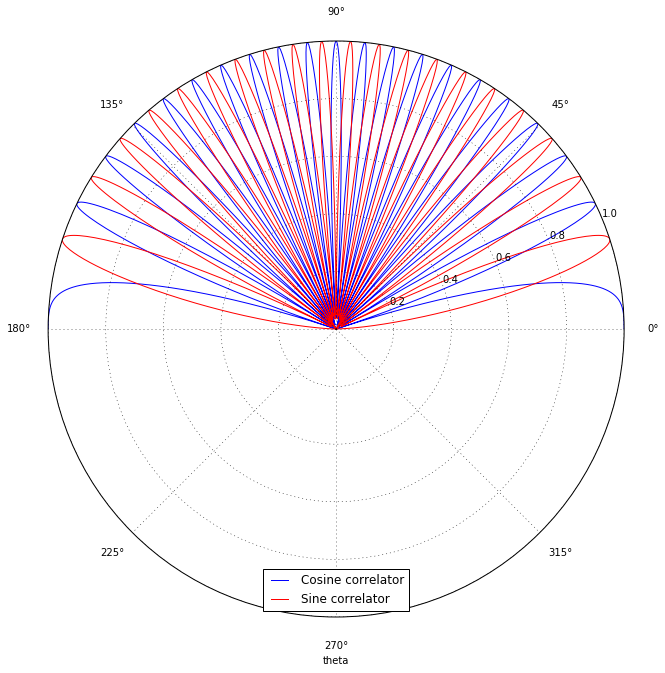

In [4]:
theta=np.linspace(0.,180.,1000)
blambda=5

filter=np.exp(-1j*2*np.pi*blambda*np.cos(np.radians(theta)))

filtercosabs=np.abs(np.real(filter))
filtersinabs=np.abs(np.imag(filter))

plt.axes([0, 0, 2, 2],polar=True)
plt.xlabel('theta')
plt.plot(np.radians(theta),np.abs(filtercosabs),'b',label="Cosine correlator")
plt.plot(np.radians(theta),np.abs(filtersinabs),'r',label="Sine correlator")
plt.legend(loc="lower center")

<a id="fig:426"></a>
**Figure 4.2.6**: Fringe patterns derived from the cosine (blue) and sine (red) correlators. 90$^\circ$ correspond to the zenith and the [0^$\circ$,180$^\circ$] corresponds to the ground.

We have defined the response of a complex correlator towards any direction $\mathbf{s}$. We will now introduce the particular direction $\mathbf{s_0}$ associated with phase center by introducing the vector $\boldsymbol{\sigma}$ such as:

\begin{eqnarray}
\mathbf{s}=\mathbf{s_0}+\boldsymbol{\sigma}
\end{eqnarray}

Then

\begin{eqnarray}
\underline{C}&=& \Delta \nu e^{-\imath 2\pi \frac{\mathbf{b}\cdot\mathbf{s_0}}{\lambda}} \int_{\Omega}  A(\mathbf{s}) I_\nu(\mathbf{s}) e^{-\imath 2\pi \frac{\mathbf{b}\cdot \boldsymbol{\sigma}}{\lambda}} d\Omega
\end{eqnarray}

The complex correlation $\underline{C}$ is the integral of the sky brightness as seen through a spatial filter. From the expression of this complex correlation we define the complex visibility, $\underline{V}$ for which we can define an amplitude and a phase.
$$\underline{V}=|V|e^{\imath\phi_V}=\int_{\Omega}A(\boldsymbol{\sigma}) I_\nu(\boldsymbol{\sigma})   e^{-\imath 2\pi \frac{\mathbf{b}\cdot \boldsymbol{\sigma}}{\lambda}} d\Omega$$

<div class=warn>
**Warning:** The position vector is now $\boldsymbol{\sigma}$ which depends on the definition of $\mathbf{s_0}$. The visibility is a quantity which depends on the definition of the phase center and will vary for any other phase center definition.</div>


As a consequence, the complex correlation and the visibility are linked by :
$$\underline{C}= \Delta \nu e^{-\imath 2\pi \frac{\mathbf{b}\cdot\mathbf{s_0}}{\lambda}} |V|e^{\imath \phi_V} = \Delta \nu |V| e^{\imath (\phi_V - 2\pi \frac{\mathbf{b}\cdot\mathbf{s_0}}{\lambda})}$$


From the measurements by the correlator, the amplitude $|V|$ and the phase $\phi_V$ of the visibility should be determined. This is the function of the calibration step which will compare the measurement to a model of the sky. The example of this section is expressed in a simplified framework. A more comprehensive framework is introduced in [$\S$ 8](../8_Calibration/8_0_Introduction.ipynb) and reference therein.


##### 4.2.3.B Effect of the bandwidth, necessity of delay tracking

Measuring a correlation over a finite bandwidth $\Delta\nu$ will introduce a *decorrelation* of the two signals because of dependence in $\nu$ of the fringe term $e^{-\imath 2 \pi \frac{\mathbf{b}\cdot \boldsymbol{\sigma}}{\lambda}}$. Indeed, due to the superposition of various wavelengths which will destroy the interfences, we will lose the temporal coherency. This will have an effect of tempering the contrast of the fringe pattern and therefore reduce the amplitude of the correlation. We will now see how much the decorrelation impacts the fringe pattern and how to correct for it.

At a frequency $\nu$, in a infinitesimal bandwidth $d \nu$, the correlator produces the output:

$$d\underline{C}= |V| e^{\imath (\phi_V - 2\pi \nu \tau)} d \nu$$ with $\tau= \frac{\mathbf{b}\cdot \mathbf{s_0}}{c}$


If we sum the response over a finite band $\Delta \nu$ centered at $\nu_0$:

$$\underline{C}= |V| \int_{\nu_0-\Delta \nu /2}^{\nu_0+\Delta \nu /2}e^{\imath (\phi_V - 2\pi \nu \tau)} d\nu= |V| \int_{\nu_0-\Delta \nu /2}^{\nu_0+\Delta \nu /2} \cos (\phi_V - 2\pi \nu \tau)d\nu + \imath  |V| \int_{\nu_0-\Delta \nu /2}^{\nu_0+\Delta \nu /2} \sin (\phi_V - 2\pi \nu \tau)d\nu$$

$$\underline{C}=  |V| \left[\frac{\sin (\phi_V - 2\pi \nu \tau)}{-2\pi \tau}\right]_{\nu_0-\Delta \nu /2}^{\nu_0+\Delta \nu /2} + \imath  |V| \left[\frac{-\cos (\phi_V - 2\pi \nu \tau)}{-2\pi \tau}\right]_{\nu_0-\Delta \nu /2}^{\nu_0+\Delta \nu /2} $$

$$\underline{C}=  \frac{|V|}{-2\pi \tau} \left[ \sin (\phi_V - 2\pi (\nu_0 +\frac{\Delta \nu}{2}) \tau) - \sin (\phi_V - 2\pi (\nu_0 -\frac{\Delta \nu}{2}) \tau)\right] + \imath  |V| \left[ \dots\right]_{\nu_0-\Delta \nu /2}^{\nu_0+\Delta \nu /2} $$

$$\underline{C}=  \frac{|V|}{2\pi \tau} \left[ 2 \cos{(\phi_V - 2\pi \nu_0  \tau) \sin{\pi\Delta\nu \tau}} \right] + \imath  \frac{|V|}{2\pi\tau} \left[ 2 \sin{(\phi_V - 2\pi \nu_0  \tau) \sin{\pi\Delta\nu \tau}}\right] $$

$$\underline{C}=  |V|\Delta\nu \frac{\sin{\pi\Delta\nu \tau}}{\pi \Delta\nu \tau}  e^{\imath (\phi_V - 2\pi \nu_0 \tau)}=|V|\Delta \nu \; \text{sinc}(\pi\Delta\nu \tau) e^{\imath (\phi_V - 2\pi \nu_0 \tau)} $$

We see that the amplitude of the correlation is now multiplied by a new modulation term. It takes a form of a sinc function which depends on the bandwidth $\Delta\nu$ and the delay $\tau$ defined in the direction of the phase center. As we still want to observe radio signals over some bandwidth, a way to *kill* this damping factor is to cancel $\tau$, which is the delay between the two signals. 
The way to do this is to inject an arbitrary delay $\tau_c=\tau$ in the signal path of the receiver which measures the signal first. 

As the direction $\mathbf{s_0}$ will move slowly in the sky as the Earth rotates, the phase center should be tracked by imposing a time dependent delay $\tau_c$ into the appropriate signal path to compensate for $\tau$.

As a result, the fringes and the envelope of the fringes will always follow the phase center.

In the following code, we will simulate the impact of observing with an interferometer in a finite bandwidth $\Delta \nu$. To do that, we sum over some wavelength range $\Delta \lambda$, the exponent factors only to mimic the computation of $\underline{C}$. The resulting figure is Fig. [4.2.7 &#10549;](#fig:427).

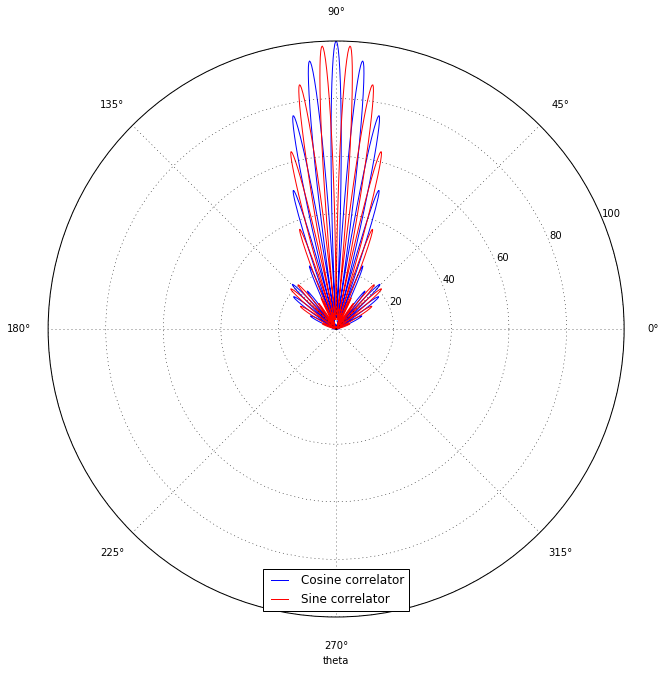

In [3]:
theta=np.linspace(0.,180.,1000)
blambda=np.linspace(4,6,100)


filter=0
for ilambda in np.arange(100):
    filter+=np.exp(-1j*2*np.pi*blambda[ilambda]*np.cos(np.radians(theta)))

filtercosabs=np.abs(np.real(filter))
filtersinabs=np.abs(np.imag(filter))

plt.axes([0, 0, 2, 2],polar=True)

plt.xlabel('theta')
plt.plot(np.radians(theta),np.abs(filtercosabs),'b',label="Cosine correlator")
plt.plot(np.radians(theta),np.abs(filtersinabs),'r',label="Sine correlator")
plt.legend(loc="lower center")

<a id="fig:427"></a>
**Figure 4.2.7**: Directional fringe pattern due to the observation in a finite bandwidth $\Delta \nu$ which modulate the fringe amplitude as sinc. 

From this plot, we note that the fringe pattern has a priviliged direction. The observation in a finite bandwidth has turn the previous fringe pattern (which had a low directivity) into a directive fringe pattern toward the zenith. If the source is to be observed at different elevation, the array response will be lower.
Using *fringe tracking*, we can track a source as it moves on the celestial sphere. Such system guarantees that the maximum array response is pointed toward to phase center.

<div class=advice>
**Note:** This delay tracking is the core principle of *phased arrays*, which electronically point the maximum array response towards the direction of interest, by introducing delays between the receivers.</div>


<div class=warn>
**Warning:** This effect is one effect among other *direction-dependent* effects which occurs in radio interferometry. This final section was to justify more clearly why we needed delay tracking.

### Conclusion

In this section, we have discussed the simple case of a 2-element interferometer in a 1 dimension case. From the correlation of the two voltages signals we constructed a quantity, the complex visibility, which is the result of the observation of the sky, through a spatial filter which characteristics depend on the projected baseline.

In the next section, we will continue to work with the complex visibility in a more general scope, by combining the notations defined in [$\S$ 4.1 &#10142;](4_1_The_Baseline.ipynb) with the notions defined in the present section.

We will see which physical quantity can be recovered through the sampling of the complex visibility function.

<p class=conclusion>
  <font size=4> **Important things to remember**</font>
  <br>

&bull; Different parts of the sky are **incoherent**; they do not interfere at the receiver level.<br>
&bull; The interference pattern is "created" by a special combination of the antenna signals.<br>
&bull; The important quantity to consider in an interferometer is the *projected* baseline which will depend on the time and direction of observation.<br>
</p>

***

* Next: [4.3 The Visibility Function](4_3_The_Visibility_Function.ipynb)